In [1]:
from pypge.search import PGE
from pypge import expand
from pypge.benchmarks import explicit

import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot the visuals in ipython
%matplotlib inline


/Users/tony/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Lipson_3 x**2*exp(sin(x)) + x - sin(x**3 - 0.25*pi)
(1, 500)


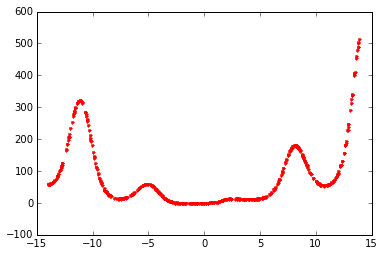

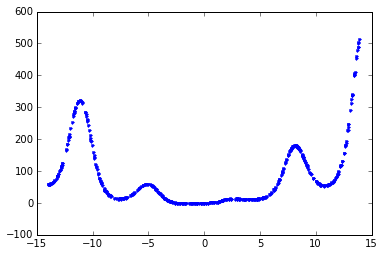

In [4]:
prob = explicit.Lipson_03(0.1)
print prob['name'], prob['eqn']
print prob['xpts'].shape

plt.plot(prob['xpts'][0], prob['ypure'], 'r.')
plt.show()
plt.plot(prob['xpts'][0], prob['ypts'], 'b.')
plt.show()



In [9]:
data = np.array([prob['xpts'][0], prob['ypts']]).T
print data.shape

import json
print json.dumps(data.tolist(), indent=4)

(500, 2)
[
    [
        -2.4854525750436025, 
        0.3414989494981061
    ], 
    [
        12.181005009490818, 
        114.20614137834933
    ], 
    [
        -2.591365656892121, 
        0.8574865980936155
    ], 
    [
        5.954424828588323, 
        31.49149669478132
    ], 
    [
        -2.635193383350103, 
        1.9065726554634201
    ], 
    [
        10.240443979576682, 
        62.02718315264735
    ], 
    [
        0.1547439836956368, 
        0.8084069493255049
    ], 
    [
        -9.15321106553811, 
        55.87891646937048
    ], 
    [
        -13.58888594207407, 
        65.21963403383087
    ], 
    [
        4.83399952105275, 
        14.317846010447147
    ], 
    [
        -11.397805319958849, 
        313.6512105896483
    ], 
    [
        -12.777121977164278, 
        120.38847815883842
    ], 
    [
        1.5696602765385617, 
        8.317160774331787
    ], 
    [
        11.54112622887703, 
        68.33533303131128
    ], 
    [
        12.1

In [10]:
pge = PGE(
    system_type = "explicit",
    search_vars = "y",
    usable_vars = prob['xs_str'],
#     usable_funcs = expand.BASIC_BASE[1:],
    pop_count = 3,
    peek_count = 9,
    max_iter = 6
    )

pge.fit(prob['xpts'], prob['ypts'])


train.shape: (1, 500) (500,)
peekn.shape: (1, 16) (16,)



Preloop setup
  create first exprs: 12
  filtering: 12
  memoizing: 12
  unique: 12 / 12
  algebra: 12
  filtering: 3
  memoizing: 3
  unique: 3 / 3
  peek'n: 15
  peek_queue'n: 15
  peek_pop'd 9 of 15
  peek_pop'd 6 of 6
  eval'n: 15
  eval_queue'n: 15
  TOTAL          1.389 seconds


ITER:  0
  eval_pop'd 3 of 15
  expanding'n: 3
  expanded to: 21
  filtering: 21
  memoizing: 20
  unique: 10 / 20
  algebra: 10
  filtering: 1
  memoizing: 1
  unique: 1 / 1
  peek'n: 11
  peek_queue'n: 11
  peek_pop'd 9 of 11
  eval'n: 9
  eval_queue'n: 9
Best so far
      id:  sz           error         r2    expld_vari    theModel
-----------------------------------------------------------------------------------
       0:   3     18421.766648   -0.716177    0.019721  2.074271*x
       6:   5     10515.687410    0.020356    0.020356  1.762897*x + 88.954492
      11:  15      5133.823444    0.521732    0.521732  0.021259*x**3 + 1.195609*x**2 +

ValueError: Invalid format specifier: s

In [11]:
pge.finalize()



Finalizing


Final Results
      id:  sz           error         r2    expld_vari    theModel
-----------------------------------------------------------------------------------
       0:   3     18421.766648   -0.716177    0.019721  2.074271*x
       6:   5     10515.687410    0.020356    0.020356  1.762897*x + 88.954492
       1:   6      5709.356989    0.468115    0.468845  1.230533*x**2
      12:   7      5391.574168    0.497719    0.498181  x*(1.231252*x + 2.125112)
      14:  10      5145.799047    0.520616    0.521088  x**2*(0.021369*x + 1.239193)
      44:  13      5035.185103    0.530921    0.531526  x*(0.04395*x**2 + 1.247248*x - 3.242636)
      23:  17      4797.059434    0.553105    0.553105  0.000169*x**5 + 1.204629*x**2 + 5.210923
      33:  19      4413.345522    0.588851    0.588851  1.0e-6*x**7 + 1.214658*x**2 + 4.930244
      77:  21      4413.345522    0.588851    0.588851  1.0e-6*x**7 + 1.214658*x**2 + 4.930246
      38:  22      4191.094236    0.609556    0.60955

ValueError: Invalid format specifier: s

In [16]:
final_paretos = pge.get_final_paretos()
print len(final_paretos)
final_list = [item for sublist in final_paretos for item in sublist]
print len(final_list), "\n\n"

10
69 




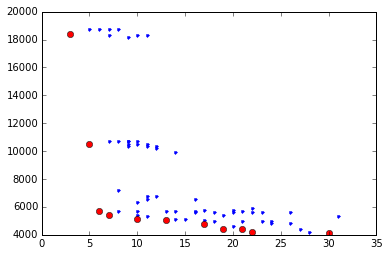

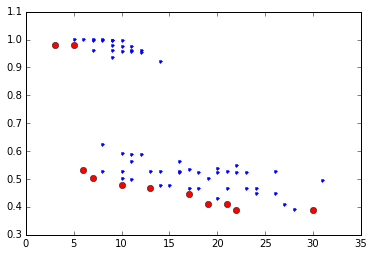

In [15]:
pge_szs = [m.size() for m in final_list]
pge_scr = [m.score for m in final_list]
pge_evar = [1.0 - m.evar for m in final_list]

pge_szs_f = [m.size() for m in final_paretos[0]]
pge_scr_f = [m.score for m in final_paretos[0]]
pge_evar_f = [1.0 - m.evar for m in final_paretos[0]]

plt.plot(pge_szs, pge_scr, 'b.', pge_szs_f, pge_scr_f, 'ro')
plt.show()
plt.plot(pge_szs, pge_evar, 'b.', pge_szs_f, pge_evar_f, 'ro')
plt.show()

In [34]:
data_p = np.array([pge_szs, pge_evar]).T
data_pf = np.array([pge_evar_f]).T
print data_p.shape, data_pf.shape


pad_len = len(pge_szs) - len(pge_szs_f)
print "pad: ", pad_len
data_pf = np.pad(data_pf, ((0,pad_len),(0,0)), mode='constant', constant_values=0)
print data_pf.shape
all_data = np.concatenate((data_p, data_pf), 1)
print all_data.shape
print json.dumps(all_data.tolist(), indent=4)



(69, 2) (11, 1)
pad:  58
(69, 1)
(69, 3)
[
    [
        3.0, 
        0.9802794803634742, 
        0.9802794803634742
    ], 
    [
        5.0, 
        0.9796444509220995, 
        0.9796444509220995
    ], 
    [
        6.0, 
        0.5311554669139156, 
        0.5311554669139156
    ], 
    [
        7.0, 
        0.5018193804124681, 
        0.5018193804124681
    ], 
    [
        10.0, 
        0.47891175887106274, 
        0.47891175887106274
    ], 
    [
        13.0, 
        0.4684738556083722, 
        0.4684738556083722
    ], 
    [
        17.0, 
        0.4468954307895313, 
        0.4468954307895313
    ], 
    [
        19.0, 
        0.4111485328606257, 
        0.4111485328606257
    ], 
    [
        21.0, 
        0.41114853286062547, 
        0.41114853286062547
    ], 
    [
        22.0, 
        0.39044353945040133, 
        0.39044353945040133
    ], 
    [
        30.0, 
        0.387871533044861, 
        0.387871533044861
    ], 
    [
        5.0, 
  

    0:   3     18421.766648   -0.716177    0.019721  2.074271*x


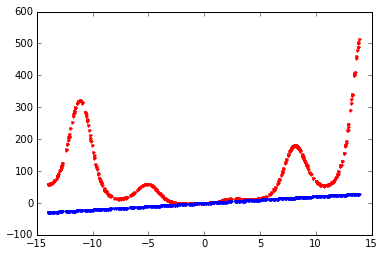

    6:   5     10515.687410    0.020356    0.020356  1.762897*x + 88.954492


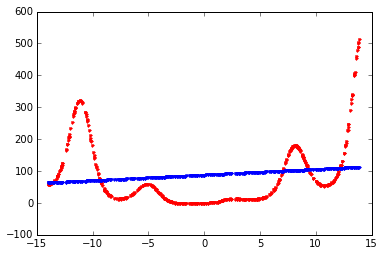

    1:   6      5709.356989    0.468115    0.468845  1.230533*x**2


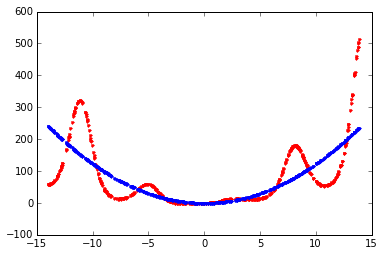

   12:   7      5391.574168    0.497719    0.498181  x*(1.231252*x + 2.125112)


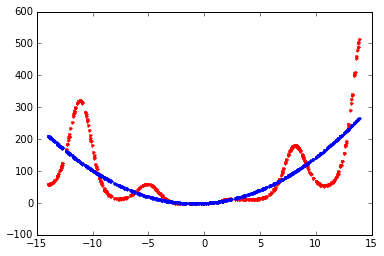

   14:  10      5145.799047    0.520616    0.521088  x**2*(0.021369*x + 1.239193)


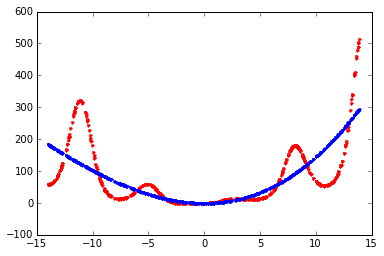

   44:  13      5035.185103    0.530921    0.531526  x*(0.04395*x**2 + 1.247248*x - 3.242636)


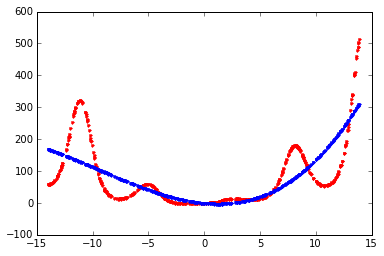

   23:  17      4797.059434    0.553105    0.553105  0.000169*x**5 + 1.204629*x**2 + 5.210923


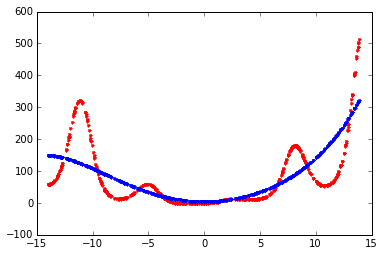

   33:  19      4413.345522    0.588851    0.588851  1.0e-6*x**7 + 1.214658*x**2 + 4.930244


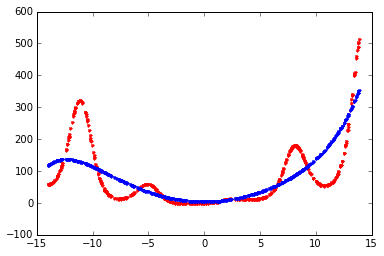

   77:  21      4413.345522    0.588851    0.588851  1.0e-6*x**7 + 1.214658*x**2 + 4.930246


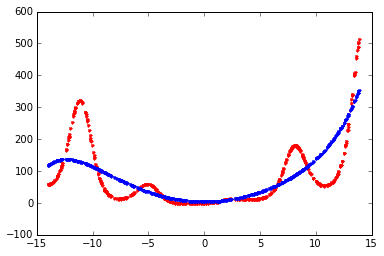

   38:  22      4191.094236    0.609556    0.609556  2.0e-6*x**7 + 1.218166*x**2 - 2.752813*x + 5.860771


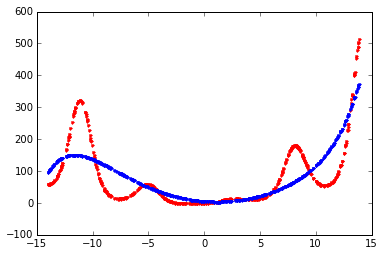

   74:  30      4163.485837    0.612128    0.612128  2.0e-6*x**7 - 0.001734*x**4 + 1.517832*x**2 - 2.780841*x - 0.324866


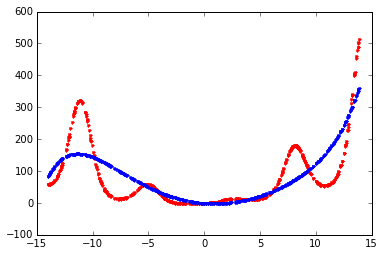

In [35]:
from pypge.evaluate import Eval

for best_m in final_paretos[0]:
    print best_m
    y_pred = Eval(best_m, pge.vars, prob['xpts'])
    plt.plot(prob['xpts'][0], prob['ypts'], 'r.',prob['xpts'][0], y_pred, 'b.')
    plt.show()


111 173
Name: 
Type: MultiDiGraph
Number of nodes: 111
Number of edges: 173
Average in degree:   1.5586
Average out degree:   1.5586
0.0141687141687


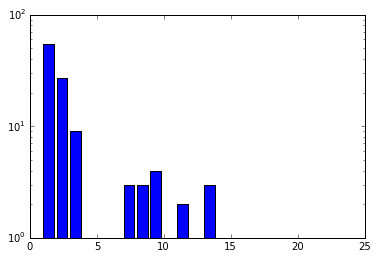

In [37]:
from sympy import *

import networkx as nx
G = pge.GRAPH
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
print n_nodes, n_edges

print nx.info(G)

print nx.density(G)

bins = nx.degree_histogram(G)


# pos=nx.graphviz_layout(G,prog="twopi",root=pge.root_model)
# nx.draw_networkx(G,pos,with_labels=False,node_size=30)
# nx.draw_circular(G,with_labels=False,node_size=30)

# pos=nx.shell_layout(G,pge.iter_expands)
# nx.draw_networkx(G,pos,with_labels=False,node_size=30)

plt.yscale('log')
plt.bar(range(0,len(bins)),bins)
plt.draw()
